Visualizing samples from train subset:


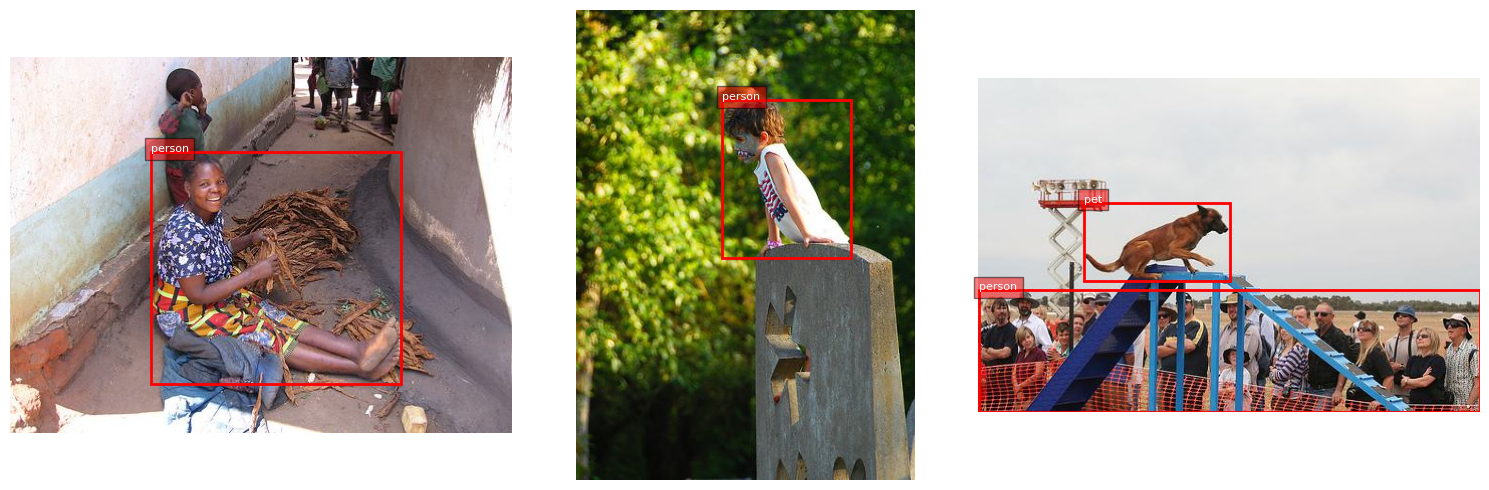

Visualizing samples from val subset:


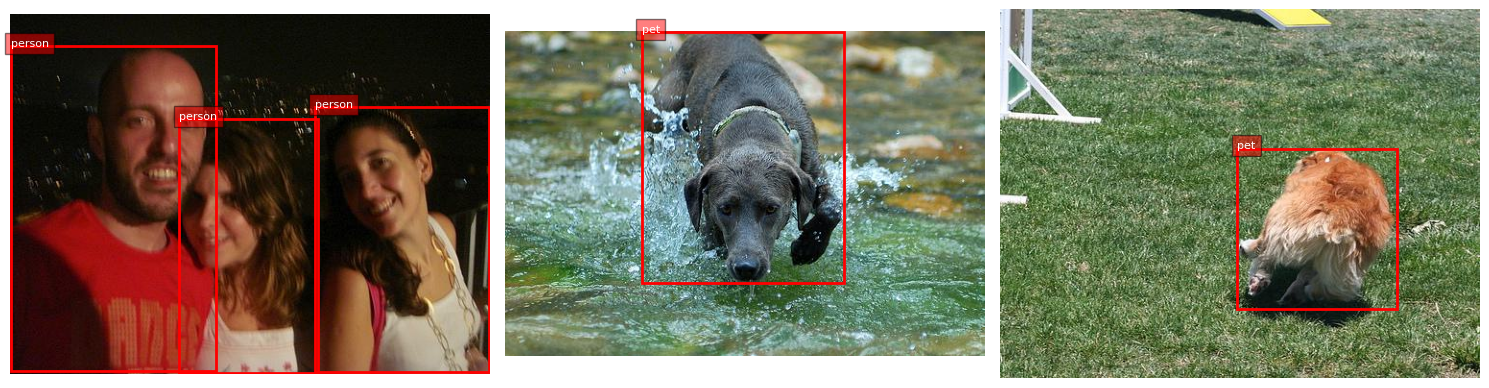

Visualizing samples from test subset:


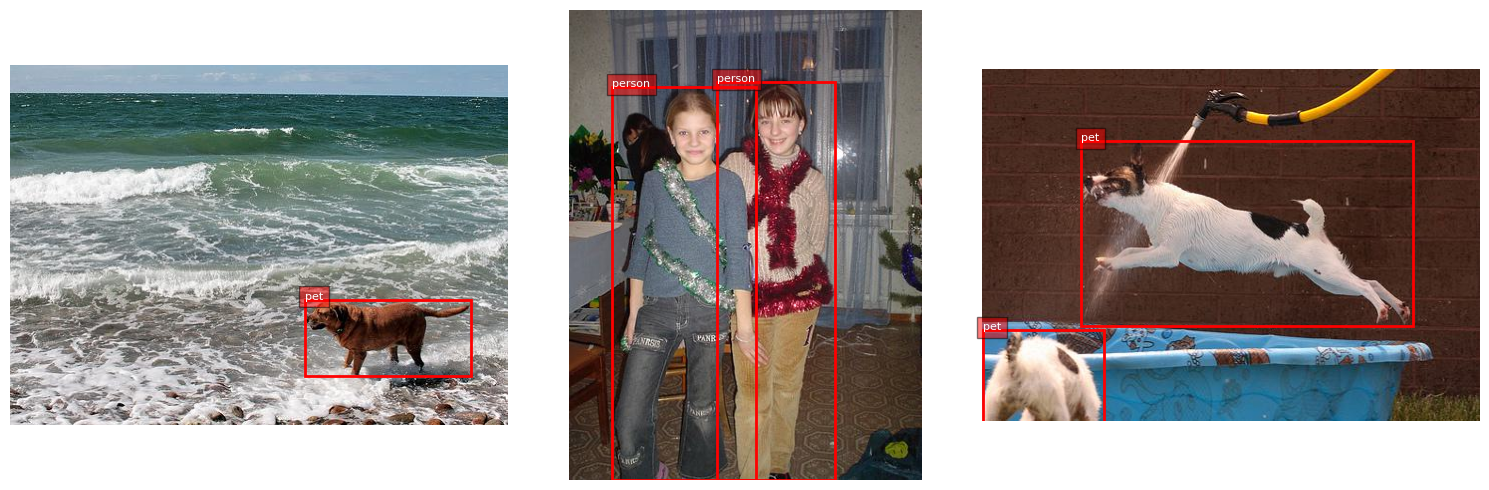

In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Paths to dataset folders
base_path = "datasets/flickr"
subsets = ["train", "val", "test"]

# Function to load and plot bounding boxes
def plot_image_with_bbox(ax, image_path, label_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")
    img_width, img_height = image.size

    # Read the label file
    with open(label_path, "r") as f:
        labels = f.readlines()
    
    # Display the image
    ax.imshow(image)
    ax.axis('off')

    # Parse and plot each bounding box
    for label in labels:
        class_id, x_center, y_center, width, height = map(float, label.split())
   
        # Convert normalized YOLO coordinates 
        x = (x_center - width / 2) * img_width  
        y = (y_center - height / 2) * img_height 
        w = width * img_width  
        h = height * img_height  

        # Draw bounding box
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Add label
        label_name = "person" if int(class_id) == 0 else "pet"
        ax.text(x, y, label_name, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

# Function to randomly sample and plot images from a subset
def visualize_samples(subset):
    print(f"Visualizing samples from {subset} subset:")
    subset_path = os.path.join(base_path, subset)
    images_path = os.path.join(subset_path, "images")
    labels_path = os.path.join(subset_path, "labels")
    
    # Get all images and their corresponding labels
    all_images = [f for f in os.listdir(images_path) if f.endswith(".jpg")]
    sampled_images = random.sample(all_images, 3)  # Randomly sample 3 images

    # Create a row with 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    for ax, img_name in zip(axs, sampled_images):
        image_path = os.path.join(images_path, img_name)
        label_path = os.path.join(labels_path, img_name.replace(".jpg", ".txt"))
        plot_image_with_bbox(ax, image_path, label_path)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Visualize samples from each subset
for subset in subsets:
    visualize_samples(subset)


In [1]:
import comet_ml

comet_ml.login(project_name="comet-example-yolo11-coco128")

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)


COMET INFO: Valid Comet API Key saved in C:\Users\stopc\.comet.config (set COMET_CONFIG to change where it is saved).


In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
results = model.train(
    data="coco8.yaml",
    project="comet-example-yolo11-coco128",
    batch=32,
    save_period=1,
    save_json=True,
    epochs=3,
)

New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=comet-example-yolo11-coco128, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=True, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, sa

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/aiigoradam/comet-example-yolo11-coco128/2b414dce87854e4b9e6023e65308dfd4



Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


COMET WARNING: Unknown error exporting current conda environment
COMET WARNING: Unknown error retrieving Conda package as an explicit file
COMET WARNING: Unknown error retrieving Conda information


AMP: checks passed 


train: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\coco8\labels\train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
val: Scanning C:\Users\stopc\Desktop\CV_Project\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to comet-example-yolo11-coco128\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to comet-example-yolo11-coco128\train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.893G      1.076      2.727       1.47         21        640: 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          4         17      0.567       0.85      0.878      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.935G      1.186      2.796      1.489         36        640: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.16it/s]

                   all          4         17      0.556       0.85      0.886      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.935G      1.096      2.509       1.22         20        640: 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]

                   all          4         17       0.56       0.85      0.851      0.615



3 epochs completed in 0.002 hours.
Optimizer stripped from comet-example-yolo11-coco128\train\weights\last.pt, 5.5MB
Optimizer stripped from comet-example-yolo11-coco128\train\weights\best.pt, 5.5MB

Validating comet-example-yolo11-coco128\train\weights\best.pt...
Ultralytics 8.3.62  Python-3.9.21 torch-2.5.1 CUDA:0 (NVIDIA GeForce GTX 1080, 8192MiB)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]


                   all          4         17      0.558       0.85      0.886      0.635
                person          3         10      0.547        0.6      0.594      0.265
                   dog          1          1      0.541          1      0.995      0.697
                 horse          1          2      0.498          1      0.995      0.674
              elephant          1          2      0.358        0.5      0.745      0.281
              umbrella          1          1      0.562          1      0.995      0.995
          potted plant          1          1      0.839          1      0.995      0.895
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Saving comet-example-yolo11-coco128\train\predictions.json...
Results saved to comet-example-yolo11-coco128\train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : effective_dingo_6834
COMET INFO:     url                   : https://www.comet.com/aiigoradam/comet-example-yolo11-coco128/2b414dce87854e4b9e6023e65308dfd4
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     loss                     : 1382350.375
COMET INFO:     lr/pg0 [4]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg1 [4]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg2 [4]               : (0.0, 8.092e-07)
COMET INFO:     metrics/mAP50(B) [4]     : (0.85059, 0.8864686337054759)
COMET INFO:     metrics/mAP50-95(B) [4]  : (0.61543, 0.6346179491541333)
COMET INFO:     metrics/precision(B) [4] : (0.55649, 0.56742)
COMET INFO:     m